### Import Data

In [1]:
import pandas as pd
import openpyxl

In [2]:
filename = "D:\\OneDrive - University of South Carolina\\Research\\CHQ_Twitter\\dataset\\0823_0711_processed_sample_data PYH05022023.xlsx"

In [3]:
# for xlsx file
# Load the workbook
workbook = openpyxl.load_workbook(filename)

# Select the active sheet (assuming the data is on the first sheet)
sheet = workbook.active

# Skip the header row
header = [cell.value for cell in next(sheet.iter_rows(min_row=1, max_row=1))]

data = []
for i, row in enumerate(sheet.iter_rows(min_row=2, values_only=True)):
    if i >= 2000:  # Stop reading after 2000 rows
        break
    tweetid, message_cleaned, Peiyin_label = row[0], row[1], row[2]
    data.append((tweetid, message_cleaned, Peiyin_label))

workbook.close()  # Close the workbook when you're done

In [4]:
data_df0823 = pd.DataFrame(data, columns=['tweetid', 'message_cleaned', 'Peiyin_label'])
data_df0823

,tweetid,message_cleaned,Peiyin_label
0,1407524271358984195,`Kill himself 🤦🏾♂; IDGAF!.. sad excuse for a h...,0
1,1407524712075386884,Nigga jumped that fence like he was diving in ...,0
2,1407525715352993792,this nigga playing with rabies and they got th...,0
3,1407526069532565507,These lame ah niggas got the fire alarm goin o...,0
4,1407527566861291523,massage can be so therapeutic. I generally do...,0
...,...,...,...
1995,771286744679317504,These fucking bitches cause harm to our sunshi...,0
1996,771287197597171712,is on the prayer line releasing the anointing ...,0
1997,771287394565763072,If a black man goes to grab a cop's gun &amp; ...,1
1998,771288096264511488,Theses niggas talk behind ya back ; theses nig...,0


In [5]:
filename = "D:\\OneDrive - University of South Carolina\\Research\\CHQ_Twitter\\dataset\\0830_0823_discrimination_query_result.xlsx"

In [7]:
# for xlsx file
# Load the workbook
workbook = openpyxl.load_workbook(filename)

# Select the active sheet (assuming the data is on the first sheet)
sheet = workbook.active

# Skip the header row
header = [cell.value for cell in next(sheet.iter_rows(min_row=1, max_row=1))]

data = []
for i, row in enumerate(sheet.iter_rows(min_row=2, values_only=True)):
    if i >= 2000:  # Stop reading after 2000 rows
        break
    tweetid, message_cleaned, Peiyin_label = row[0], row[4], row[5]
    data.append((tweetid, message_cleaned, Peiyin_label))

workbook.close()  # Close the workbook when you're done

In [8]:
data_df0830 = pd.DataFrame(data, columns=['tweetid', 'message', 'Peiyin_label'])
data_df0830

,tweetid,message,Peiyin_label
0,771289721330864128,When you find out yo ex Nigga basically been c...,0
1,771289884917194753,And you find out they Twitter years later; so ...,0
2,771289987337822208,Thank you Wayne &amp; Jackie @agapetours shift...,0
3,771290300102959104,#RaceConfessions I white and I like fried chic...,1
4,771291103836471297,Go get this fuckin Paper .. Ain nuthn else imp...,0
...,...,...,...
494,865969544132734978,Nigga it's hot as hell who wearing that https:...,0
495,865969548654247936,Change gotta young nigga paid,0
496,865970210288881668,Imma hold it down for the gangniggas going bro...,0
497,865970298616770560,Nigga don't try to hug me https://t.co/bEcIa6...,0


In [9]:
import re
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               # u"\U0001F600-\U0001F64F"  # emojicons
                               # u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               # u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               # u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               # u"\U00002500-\U00002BEF"  # chinese char
                               # u"\U00002702-\U000027B0"
                               # u"\U00002702-\U000027B0"
                               # u"\U000024C2-\U0001F251"
                               # u"\U0001f926-\U0001f937"
                               # u"\U00010000-\U0010ffff"
                               # u"\u2640-\u2642"
                               # u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def clean_twts(tw):
  # remove urls
  pattern = 'https{0,1}:\/\/t.co\/[a-zA-Z0-9]+'
  tw = re.sub(pattern, "", tw)
  # remove @
  pattern = '@[a-zA-Z0-9_]+ '
  tw = re.sub(pattern, "", tw)
  tw = remove_emoji(tw)
  return tw

def clean_twt_row(row):
    return clean_twts(row['message'])

In [10]:
data_df0830['message_cleaned'] = data_df0830.apply(clean_twt_row, axis=1)
data_df0830['message_cleaned'].iloc[1]

'And you find out they Twitter years later; so you grow a little for hate for this Nigga cause he lies; basically'

In [11]:
data_df0830 = data_df0830.reindex(columns=['tweetid', 'message_cleaned', 'Peiyin_label'])
data_df0830

,tweetid,message_cleaned,Peiyin_label
0,771289721330864128,When you find out yo ex Nigga basically been c...,0
1,771289884917194753,And you find out they Twitter years later; so ...,0
2,771289987337822208,Thank you Wayne &amp; Jackie shifting our mind...,0
3,771290300102959104,#RaceConfessions I white and I like fried chic...,1
4,771291103836471297,Go get this fuckin Paper .. Ain nuthn else imp...,0
...,...,...,...
494,865969544132734978,Nigga it's hot as hell who wearing that,0
495,865969548654247936,Change gotta young nigga paid,0
496,865970210288881668,Imma hold it down for the gangniggas going bro...,0
497,865970298616770560,Nigga don't try to hug me,0


In [12]:
final_df = pd.concat([data_df0823, data_df0830], axis=0)
final_df = final_df.reset_index(drop=True)
final_df

,tweetid,message_cleaned,Peiyin_label
0,1407524271358984195,`Kill himself 🤦🏾♂; IDGAF!.. sad excuse for a h...,0
1,1407524712075386884,Nigga jumped that fence like he was diving in ...,0
2,1407525715352993792,this nigga playing with rabies and they got th...,0
3,1407526069532565507,These lame ah niggas got the fire alarm goin o...,0
4,1407527566861291523,massage can be so therapeutic. I generally do...,0
...,...,...,...
2494,865969544132734978,Nigga it's hot as hell who wearing that,0
2495,865969548654247936,Change gotta young nigga paid,0
2496,865970210288881668,Imma hold it down for the gangniggas going bro...,0
2497,865970298616770560,Nigga don't try to hug me,0


### Feature Extraction using BERT

In [13]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [14]:
def extract_features_cls(text):
    # Ensure text is not None and is a string
    if text is None or not isinstance(text, str):
        return [0] * 768  # return a zero-vector if the text is not valid
    
    input_ids = tokenizer.encode(text, return_tensors='pt', truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(input_ids)
    # Only the representation of the [CLS] token
    features = outputs.last_hidden_state[0][0].numpy()
    return features

In [16]:
features = final_df['message_cleaned'].apply(extract_features_cls).tolist()

In [18]:
# Convert the list of arrays into a new DataFrame
features_df = pd.DataFrame(features)

# Rename columns
features_df.columns = ['feature_' + str(i+1) for i in range(features_df.shape[1])]

# Join with the original data
final_df = pd.concat([final_df, features_df], axis=1)
final_df

,tweetid,message_cleaned,Peiyin_label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,1407524271358984195,`Kill himself 🤦🏾♂; IDGAF!.. sad excuse for a h...,0,0.409285,0.128769,0.238427,-0.015893,-0.349818,-0.512702,0.672533,...,0.071603,-0.213757,0.010856,0.004634,-0.148828,0.198952,-0.445685,-0.171254,0.514169,0.284979
1,1407524712075386884,Nigga jumped that fence like he was diving in ...,0,-0.015626,0.240909,-0.093223,0.212963,-0.494720,-0.346423,0.418136,...,0.041773,-0.215335,-0.038968,0.011865,-0.167698,0.366561,0.029456,-0.362760,0.606040,0.304274
2,1407525715352993792,this nigga playing with rabies and they got th...,0,-0.053916,0.140025,0.146189,-0.216232,-0.464869,-0.218352,0.471100,...,-0.013012,-0.055596,-0.121168,-0.072159,0.168356,0.020411,-0.129020,-0.510056,0.795642,0.379077
3,1407526069532565507,These lame ah niggas got the fire alarm goin o...,0,0.114539,0.488007,-0.017341,0.025995,-0.579112,-0.249456,0.829920,...,0.147805,-0.434184,-0.306081,-0.045804,0.142817,0.426865,-0.110841,-0.728594,0.651678,0.212515
4,1407527566861291523,massage can be so therapeutic. I generally do...,0,0.157438,-0.012381,-0.069939,-0.165616,-0.320143,-0.618617,0.427306,...,0.086122,-0.634412,0.148534,-0.122560,0.244454,-0.024895,-0.292478,-0.204051,0.246331,0.512704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,865969544132734978,Nigga it's hot as hell who wearing that,0,0.213149,0.233994,0.099616,-0.078379,-0.314259,-0.393942,0.584330,...,0.243746,-0.546945,-0.002881,-0.334076,0.274040,-0.201294,0.168792,-0.780983,0.252407,0.028327
2495,865969548654247936,Change gotta young nigga paid,0,0.064308,0.114829,0.140351,-0.006839,-0.132089,-0.074255,0.215265,...,-0.026599,-0.070186,-0.009687,-0.043644,0.050588,0.054042,-0.230261,-0.190818,0.042328,0.070859
2496,865970210288881668,Imma hold it down for the gangniggas going bro...,0,-0.148769,0.229519,0.236980,-0.230936,-0.489961,-0.214400,0.408020,...,-0.379337,-0.502243,-0.025314,0.042758,0.136226,0.474116,-0.409987,-0.158161,0.279753,0.589959
2497,865970298616770560,Nigga don't try to hug me,0,0.056463,-0.034261,0.019960,0.050586,-0.231950,-0.218787,0.612642,...,-0.149696,-0.284126,0.331659,0.102601,0.642319,-0.117914,-0.150014,-0.263410,0.076423,0.458544


### Neural Network

In [19]:
import tensorflow as tf
from tensorflow.keras import layers

In [20]:
# Splitting data into training and testing sets (80% train, 20% test)
train_df = final_df.sample(frac=0.8, random_state=42)
test_df = final_df.drop(train_df.index)

# Preparing the features and labels
X_train = train_df[['feature_' + str(i+1) for i in range(768)]].values
y_train = train_df['Peiyin_label'].values

X_test = test_df[['feature_' + str(i+1) for i in range(768)]].values
y_test = test_df['Peiyin_label'].values

In [21]:
# Neural network architecture
model = tf.keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(768,)),
    layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               393728    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 525,313
Trainable params: 525,313
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
50/50 [==============================] - 4s 9ms/step - loss: 0.2885 - accuracy: 0.9018 - val_loss: 0.2121 - val_accuracy: 0.9100
Epoch 2/10
50/50 [==============================] - 0s 3ms/step - loss: 0.1976 - accuracy: 0.9218 - val_loss: 0.1883 - val_accuracy: 0.9150
Epoch 3/10
50/50 [==============================] - 0s 3ms/step - loss: 0.1794 - accuracy: 0.9293 - val_loss: 0.1923 - val_accuracy: 0.9125
Epoch 4/10
50/50 [==============================] - 0s 3ms/step - loss: 0.1649 - accuracy: 0.9362 - val_loss: 0.2158 - val_accuracy: 0.8900
Epoch 5/10
50/50 [==============================] - 0s 2ms/step - loss: 0.1452 - accuracy: 0.9450 - val_loss: 0.1818 - val_accuracy: 0.9225
Epoch 6/10
50/50 [==============================] - 0s 3ms/step - loss: 0.1314 - accuracy: 0.9512 - val_loss: 0.1912 - val_accuracy: 0.9125
Epoch 7/10
50/50 [==============================] - 0s 3ms/step - loss: 0.1252 - accuracy: 0.9487 - val_loss: 0.2071 - val_accuracy: 0.9175
Epoch 8/10
50/50 [==

In [24]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

16/16 [==============================] - 0s 3ms/step - loss: 0.1226 - accuracy: 0.9500
Test Accuracy: 95.00%


### Prediction

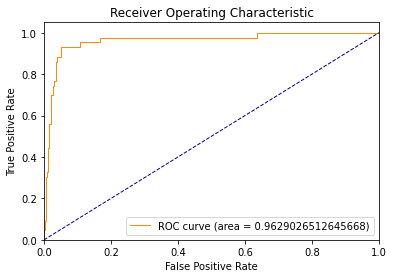

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# 2. Compute the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_prob)

# 3. Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label=f'ROC curve (area = {auc})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [42]:
import numpy as np

# Calculate the Euclidean distance from each point to (0,1)
distances = np.sqrt((0 - fpr)**2 + (1 - tpr)**2)

# Find the minimum distance and use it as the best threshold
best_idx = np.argmin(distances)
best_threshold = _[best_idx]

print(f'Best threshold value: {best_threshold}')

Best threshold value: 0.21423281729221344


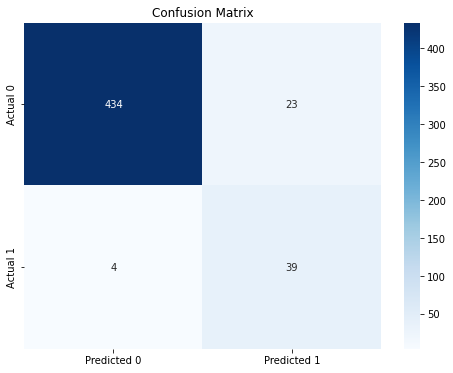

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Predict on the test set.
y_pred_prob = model.predict(X_test)
# 2. Convert predictions to binary labels.
y_pred = (y_pred_prob > best_threshold).astype(int)

# 3. Generate confusion matrix
matrix = confusion_matrix(y_test, y_pred)
# 4. Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

In [44]:
matrix

array([[434,  23],
       [  4,  39]], dtype=int64)

In [45]:
import numpy as np
mask = (y_pred.reshape(-1) == 0) & (y_test.reshape(-1) == 1)

In [46]:
wrong_label = test_df.iloc[mask, :]
wrong_label

,tweetid,message_cleaned,Peiyin_label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
412,1081342626589278209,R. Kelly is still on my Playlist.. Let's conti...,1,0.334602,-0.021441,0.199870,0.102917,-0.371286,-0.496002,0.481775,...,-0.163096,-0.213857,0.142161,-0.025025,0.059546,0.151208,-0.216795,-0.361619,0.534766,0.316034
1297,1255672137219747842,thats like getting mad at a fish for swimming ...,1,0.339396,0.108980,0.037517,-0.249103,-0.605387,-0.605657,0.778333,...,0.084944,-0.258033,-0.009141,-0.231139,0.149838,0.398545,-0.423924,-0.981163,0.429935,0.463864
1485,978473953223151621,So Ive seen the takashi69 interview;I cant wai...,1,-0.054252,0.236695,-0.285545,-0.164112,-0.686573,-0.518674,0.712036,...,0.071535,-0.274126,0.173111,-0.263062,0.086112,0.457177,-0.309112,-0.908201,0.503251,0.302344
2372,978476910865997825,Another unarmed black man shot &amp; killed. 2...,1,-0.076440,-0.017253,0.350475,-0.069634,-0.322188,-0.222431,0.726447,...,0.118918,-0.394892,-0.233187,-0.212043,0.149159,0.559986,-0.614263,-0.326858,0.478596,0.139337


In [63]:
# Save the dataframe to an Excel file
wrong_label.to_excel('output.xlsx', index=False, engine='openpyxl')